In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/pkitt/OneDrive/Desktop/insurance_data.csv")

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [5]:
df.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [6]:
df.shape

(1340, 11)

<Axes: >

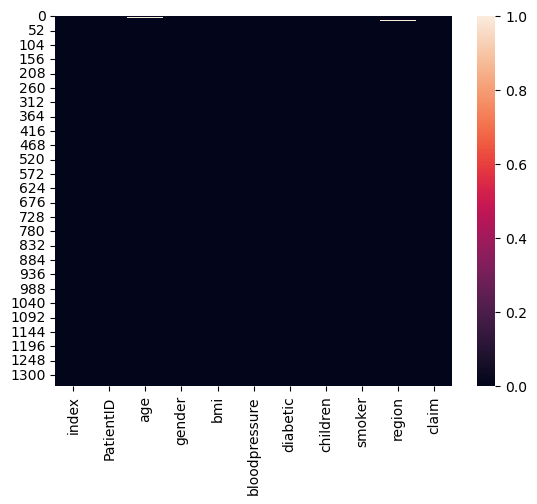

In [7]:
sns.heatmap(df.isnull())

<Axes: xlabel='region', ylabel='count'>

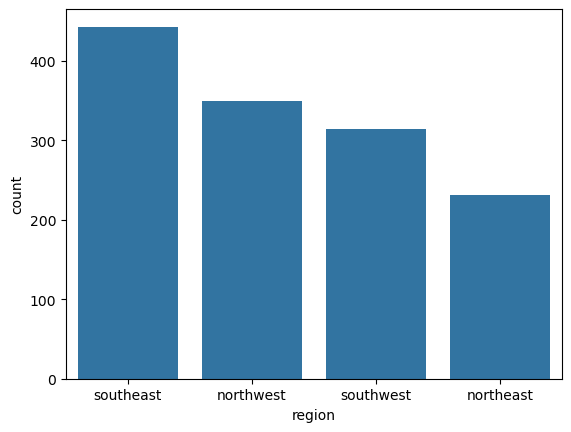

In [8]:
sns.countplot(x='region',data=df)

<Axes: xlabel='region', ylabel='count'>

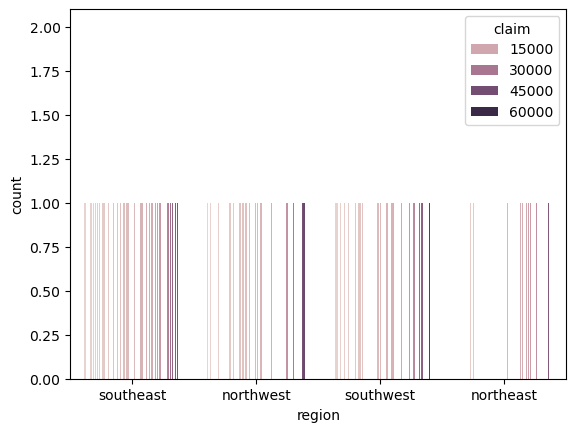

In [9]:
sns.countplot(x='region',hue='claim',data=df)

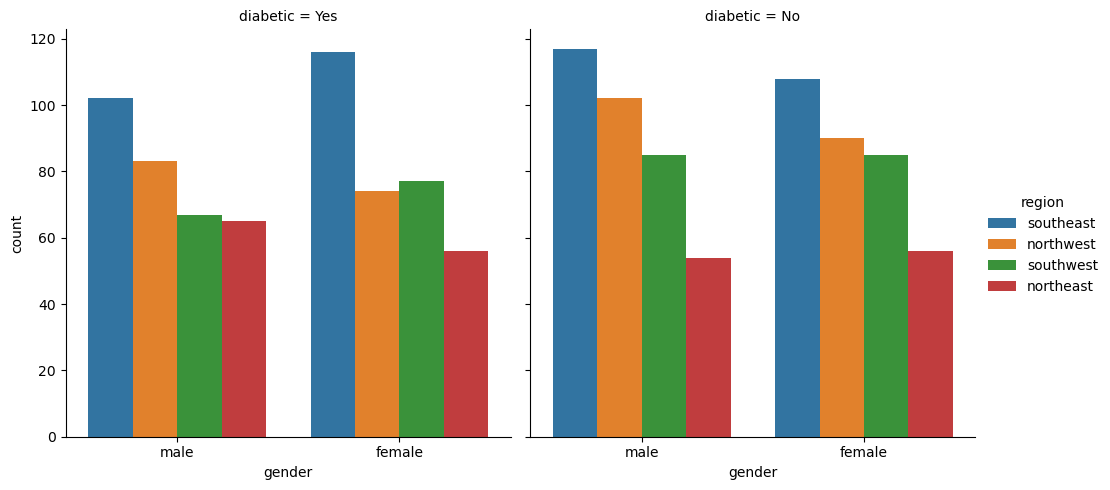

In [10]:
sns.catplot(x="gender", hue="region", col="diabetic", kind="count", data=df)

<Axes: ylabel='Frequency'>

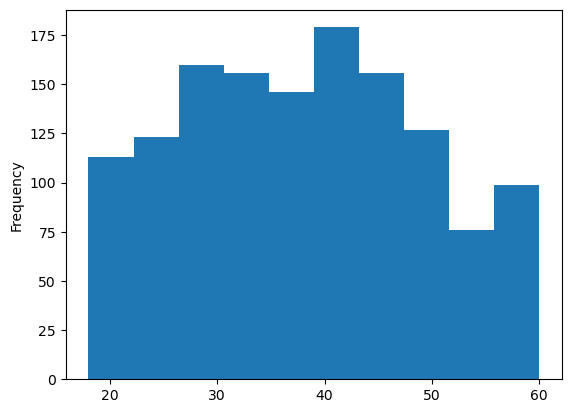

In [11]:
df["age"].plot.hist()

In [12]:
df.shape

(1340, 11)

In [13]:
# Data Cleaning
df.isnull().sum()/len(df)

index            0.000000
PatientID        0.000000
age              0.003731
gender           0.000000
bmi              0.000000
bloodpressure    0.000000
diabetic         0.000000
children         0.000000
smoker           0.000000
region           0.002239
claim            0.000000
dtype: float64

In [14]:
df.num=df.select_dtypes(include=[np.number])

C:\Users\pkitt\AppData\Local\Temp\ipykernel_19388\610118065.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.num=df.select_dtypes(include=[np.number])


In [15]:
df.cat=df.select_dtypes(include=[object])

C:\Users\pkitt\AppData\Local\Temp\ipykernel_19388\1314421663.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cat=df.select_dtypes(include=[object])


In [16]:
df.cat.head()

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest


In [17]:
df.cat.region.fillna(df.cat.region.value_counts().idxmax(),inplace=True)

C:\Users\pkitt\AppData\Local\Temp\ipykernel_19388\1153842254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.cat.region.fillna(df.cat.region.value_counts().idxmax(),inplace=True)


In [18]:
df.num.age.fillna(df.num.age.value_counts().mean(),inplace=True)

C:\Users\pkitt\AppData\Local\Temp\ipykernel_19388\2385280870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.num.age.fillna(df.num.age.value_counts().mean(),inplace=True)


In [19]:
df.isnull().sum()/len(df)

index            0.000000
PatientID        0.000000
age              0.003731
gender           0.000000
bmi              0.000000
bloodpressure    0.000000
diabetic         0.000000
children         0.000000
smoker           0.000000
region           0.002239
claim            0.000000
dtype: float64

In [20]:
df.num.isnull().sum()/len(df.num)

index            0.0
PatientID        0.0
age              0.0
bmi              0.0
bloodpressure    0.0
children         0.0
claim            0.0
dtype: float64

In [21]:
df.cat.isnull().sum()/len(df.cat)

gender      0.0
diabetic    0.0
smoker      0.0
region      0.0
dtype: float64

In [22]:
df.num.head()

,index,PatientID,age,bmi,bloodpressure,children,claim
0,0,1,39.000000,23.2,91,0,1121.87
1,1,2,24.000000,30.1,87,0,1131.51
2,2,3,31.046512,33.3,82,0,1135.94
3,3,4,31.046512,33.7,80,0,1136.40
4,4,5,31.046512,34.1,100,0,1137.01


In [23]:
from sklearn.preprocessing import LabelBinarizer

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lb = LabelBinarizer()
df.cat["diabetic_binarized"] = lb.fit_transform(df.cat["diabetic"])  # Works only on one column at a time

In [26]:
lb = LabelBinarizer()
df.cat["smoker_binarized"] = lb.fit_transform(df.cat["smoker"])  # Works only on one column at a time

In [27]:
lb = LabelBinarizer()
df.cat["gender_binarized"] = lb.fit_transform(df.cat["gender"])  # Works only on one column at a time

In [28]:
df.cat.head()

,gender,diabetic,smoker,region,diabetic_binarized,smoker_binarized,gender_binarized
0,male,Yes,No,southeast,1,0,1
1,male,No,No,southeast,0,0,1
2,male,Yes,No,southeast,1,0,1
3,male,No,No,northwest,0,0,1
4,male,No,No,northwest,0,0,1


In [29]:
df.cat.drop(["gender","diabetic","smoker"],axis=1)

,region,diabetic_binarized,smoker_binarized,gender_binarized
0,southeast,1,0,1
1,southeast,0,0,1
2,southeast,1,0,1
3,northwest,0,0,1
4,northwest,0,0,1
...,...,...,...,...
1335,northwest,1,1,0
1336,northeast,0,1,0
1337,northwest,1,1,1
1338,southeast,0,1,1


In [30]:
le = LabelEncoder()

In [31]:

df.cat["region_encoded"] = le.fit_transform(df.cat["region"])

In [32]:
df.cat.head()

,gender,diabetic,smoker,region,diabetic_binarized,smoker_binarized,gender_binarized,region_encoded
0,male,Yes,No,southeast,1,0,1,2
1,male,No,No,southeast,0,0,1,2
2,male,Yes,No,southeast,1,0,1,2
3,male,No,No,northwest,0,0,1,1
4,male,No,No,northwest,0,0,1,1


In [33]:
df.cat.drop(["gender","diabetic","smoker","region"],axis=1,inplace=True)

In [34]:
df.cat.head(20)

,diabetic_binarized,smoker_binarized,gender_binarized,region_encoded
0,1,0,1,2
1,0,0,1,2
2,1,0,1,2
3,0,0,1,1
4,0,0,1,1
5,1,0,1,1
6,1,0,1,1
7,0,0,1,1
8,0,0,1,1
9,0,0,1,1


In [35]:
df.cat.tail()

,diabetic_binarized,smoker_binarized,gender_binarized,region_encoded
1335,1,1,0,1
1336,0,1,0,0
1337,1,1,1,1
1338,0,1,1,2
1339,0,1,0,2


In [36]:
df.final = pd.concat([df.num,df.cat],axis=1)

C:\Users\pkitt\AppData\Local\Temp\ipykernel_19388\1938318519.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.final = pd.concat([df.num,df.cat],axis=1)


In [37]:
df.final.head(50)

,index,PatientID,age,bmi,bloodpressure,children,claim,diabetic_binarized,smoker_binarized,gender_binarized,region_encoded
0,0,1,39.000000,23.2,91,0,1121.87,1,0,1,2
1,1,2,24.000000,30.1,87,0,1131.51,0,0,1,2
2,2,3,31.046512,33.3,82,0,1135.94,1,0,1,2
3,3,4,31.046512,33.7,80,0,1136.40,0,0,1,1
4,4,5,31.046512,34.1,100,0,1137.01,0,0,1,1
5,5,6,31.046512,34.4,96,0,1137.47,1,0,1,1
6,6,7,31.046512,37.3,86,0,1141.45,1,0,1,1
7,7,8,19.000000,41.1,100,0,1146.80,0,0,1,1
8,8,9,20.000000,43.0,86,0,1149.40,0,0,1,1
9,9,10,30.000000,53.1,97,0,1163.46,0,0,1,1


In [38]:
matrix=df.final.corr()

In [39]:
matrix

,index,PatientID,age,bmi,bloodpressure,children,claim,diabetic_binarized,smoker_binarized,gender_binarized,region_encoded
index,1.000000,1.000000,-0.003373,0.115129,0.450602,0.128104,0.879268,-0.004460,0.663159,0.007235,-0.127413
PatientID,1.000000,1.000000,-0.003373,0.115129,0.450602,0.128104,0.879268,-0.004460,0.663159,0.007235,-0.127413
age,-0.003373,-0.003373,1.000000,-0.043396,-0.059092,-0.023341,-0.025467,-0.026614,-0.030603,-0.394935,0.004597
bmi,0.115129,0.115129,-0.043396,1.000000,0.143544,0.012092,0.197401,-0.036969,0.003670,0.046812,0.134600
bloodpressure,0.450602,0.450602,-0.059092,0.143544,1.000000,-0.031682,0.531341,-0.012689,0.418265,0.012437,-0.021169
children,0.128104,0.128104,-0.023341,0.012092,-0.031682,1.000000,0.069233,-0.014739,0.008355,0.015800,0.041385
claim,0.879268,0.879268,-0.025467,0.197401,0.531341,0.069233,1.000000,-0.008725,0.787279,0.055766,-0.078009
diabetic_binarized,-0.004460,-0.004460,-0.026614,-0.036969,-0.012689,-0.014739,-0.008725,1.000000,0.017502,-0.017428,-0.024654
smoker_binarized,0.663159,0.663159,-0.030603,0.003670,0.418265,0.008355,0.787279,0.017502,1.000000,0.075366,-0.058550
gender_binarized,0.007235,0.007235,-0.394935,0.046812,0.012437,0.015800,0.055766,-0.017428,0.075366,1.000000,-0.028497


In [40]:
X=df.final[["bmi","bloodpressure","smoker_binarized","children","gender_binarized"]]
X.head()

,bmi,bloodpressure,smoker_binarized,children,gender_binarized
0,23.2,91,0,0,1
1,30.1,87,0,0,1
2,33.3,82,0,0,1
3,33.7,80,0,0,1
4,34.1,100,0,0,1


In [41]:
#X = X.reshape(1, -1)

In [42]:
y=df.final[['claim']]
y.head()

,claim
0,1121.87
1,1131.51
2,1135.94
3,1136.40
4,1137.01


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
#from sklearn.model_selection import RandomizedSearchCV

In [46]:
#random_search = RandomizedSearchCV(rf, param_distributions=df.final, n_iter=10, cv=1340, verbose=1, n_jobs=-1)

In [47]:
#from sklearn.datasets import make_regression

In [48]:
#X, y = make_regression(n_samples=1340, n_features=4, noise=1, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor()

In [51]:
#from sklearn.linear_model import LinearRegression

In [52]:
#lr=LinearRegression()

In [53]:
#from sklearn.tree import DecisionTreeRegressor

In [54]:
#DTR=DecisionTreeRegressor()

In [55]:
#random_search.fit(X,y)

In [56]:
fit=rf.fit(X,y)

C:\Users\pkitt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [57]:
#DTR.score(X_train,y_train)

In [58]:
#DTR.score(X_test,y_test)

In [59]:
fit.score(X_train,y_train)

0.9661126456181333

In [60]:
fit.score(X_test,y_test)

0.9700754017002524

In [61]:
fit.score(X,y)

0.9675044519133017

In [62]:
rf.predict([[23,91,0,0,1]])

C:\Users\pkitt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2858.677])

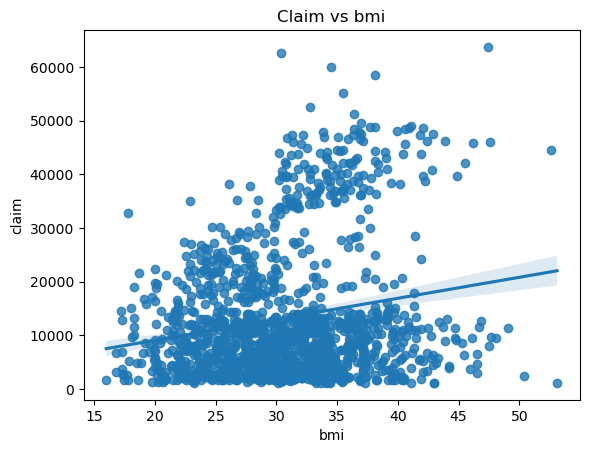

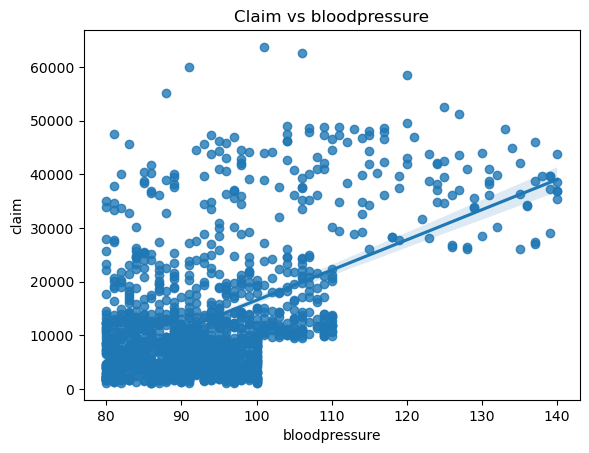

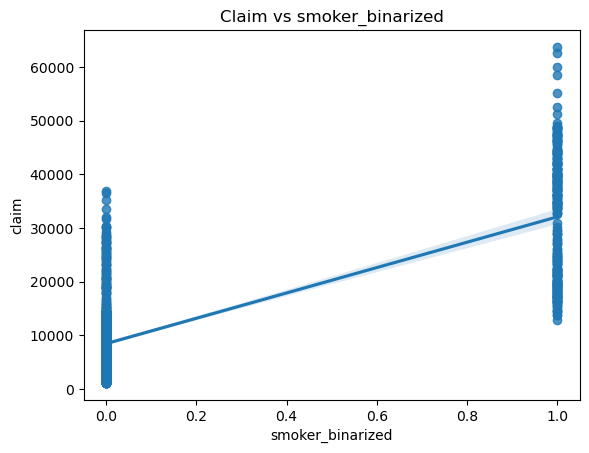

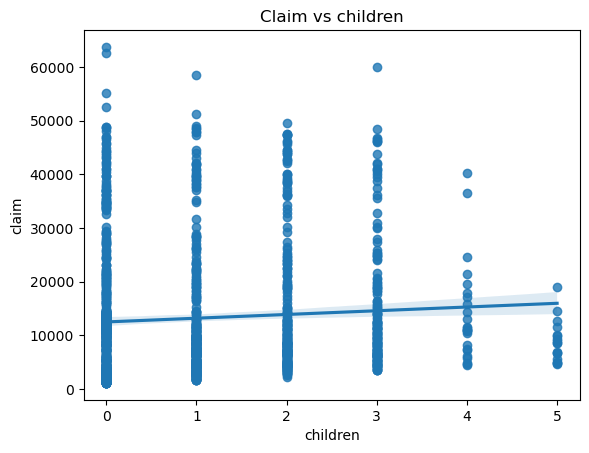

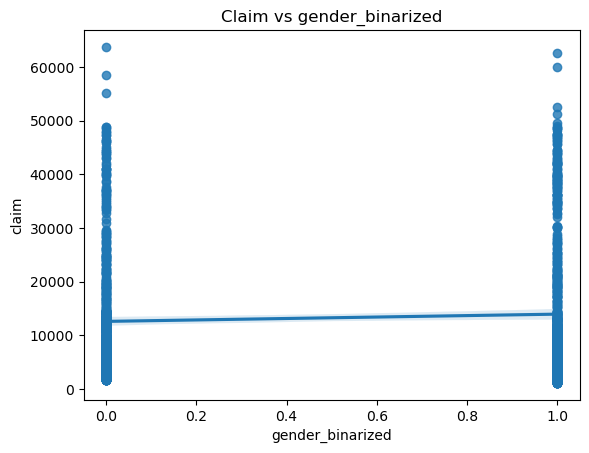

In [63]:
x=df.final[["bmi","bloodpressure","smoker_binarized","children","gender_binarized"]]
y=df.final[['claim']]
for feature in ["bmi", "bloodpressure", "smoker_binarized", "children", "gender_binarized"]:
    sns.regplot(x=feature, y="claim", data=df.final)
    plt.title(f"Claim vs {feature}")
    plt.show()

In [64]:
pre=rf.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y,rf.predict(X)))

ValueError: continuous is not supported

In [74]:
confussion_matrix(y_train,rf.predict(X_train))

NameError: name 'confussion_matrix' is not defined